<a href="https://colab.research.google.com/github/furkantprk/ml_regressor/blob/main/Regresyon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install ucimlrepo

MODELLERDE DÜZELTMELER YAPMAK AMACIYLA KOD RAPOR AŞAMASINDA VEYA SONRASINDA BİRKAÇ KEZ ÇALIŞTIRILDIĞI İÇİN VE İNTERNET VB. KONULARDAN DOLAYI TOPLAM ZAMAN HESAPLAMALARINDA UFAK DEĞİŞİMLER GÖZE ÇARPABİLİR ANCAK GENEL YORUMLARI ETKİLEYECEK KADAR FARK OLMAYACAKTIR!

In [ ]:
#Direkt olarak dataset'in bulunduğu siteden import işlemini gerçekleştiriyorum:
#https://archive.ics.uci.edu/dataset/851/steel+industry+energy+consumption

from ucimlrepo import fetch_ucirepo

# fetch dataset
steel_industry_energy_consumption = fetch_ucirepo(id=851)

# data (as pandas dataframes)
X = steel_industry_energy_consumption.data.features
y = steel_industry_energy_consumption.data.targets

# metadata
print(steel_industry_energy_consumption.metadata)

# variable information
print(steel_industry_energy_consumption.variables)


{'uci_id': 851, 'name': 'Steel Industry Energy Consumption', 'repository_url': 'https://archive.ics.uci.edu/dataset/851/steel+industry+energy+consumption', 'data_url': 'https://archive.ics.uci.edu/static/public/851/data.csv', 'abstract': 'The data is collected from a smart small-scale steel industry in South Korea.', 'area': 'Physics and Chemistry', 'tasks': ['Regression'], 'characteristics': ['Multivariate'], 'num_instances': 35040, 'num_features': 9, 'feature_types': ['Real', 'Categorical'], 'demographics': [], 'target_col': ['Load_Type'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2021, 'last_updated': 'Mon Aug 14 2023', 'dataset_doi': '10.24432/C52G8C', 'creators': ['Sathishkumar V E', 'Changsun Shin', 'Yongyun Cho'], 'intro_paper': {'ID': 262, 'type': 'NATIVE', 'title': 'Efficient energy consumption prediction model for a data analytic-enabled industry building in a smart city', 'authors': 'Sathishkumar V E, Changsun S

In [ ]:
import pandas as pd

df = pd.concat([X, y], axis=1)

print(df.head())
print(df.info())
print(df.describe())

print(df.isnull().sum())

   Usage_kWh  Lagging_Current_Reactive.Power_kVarh  \
0       3.17                                  2.95   
1       4.00                                  4.46   
2       3.24                                  3.28   
3       3.31                                  3.56   
4       3.82                                  4.50   

   Leading_Current_Reactive_Power_kVarh  CO2(tCO2)  \
0                                   0.0        0.0   
1                                   0.0        0.0   
2                                   0.0        0.0   
3                                   0.0        0.0   
4                                   0.0        0.0   

   Lagging_Current_Power_Factor  Leading_Current_Power_Factor   NSM  \
0                         73.21                         100.0   900   
1                         66.77                         100.0  1800   
2                         70.28                         100.0  2700   
3                         68.09                         100.0  360

In [ ]:
import pandas as pd

#Tipi object olan veriler için One-Hot Encoding uyguluyorum
df_processed = pd.get_dummies(df, columns=['Load_Type', 'WeekStatus', 'Day_of_week'], drop_first=True)

print(df_processed.info())

display(df_processed.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35040 entries, 0 to 35039
Data columns (total 16 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Usage_kWh                             35040 non-null  float64
 1   Lagging_Current_Reactive.Power_kVarh  35040 non-null  float64
 2   Leading_Current_Reactive_Power_kVarh  35040 non-null  float64
 3   CO2(tCO2)                             35040 non-null  float64
 4   Lagging_Current_Power_Factor          35040 non-null  float64
 5   Leading_Current_Power_Factor          35040 non-null  float64
 6   NSM                                   35040 non-null  int64  
 7   Load_Type_Maximum_Load                35040 non-null  bool   
 8   Load_Type_Medium_Load                 35040 non-null  bool   
 9   WeekStatus_Weekend                    35040 non-null  bool   
 10  Day_of_week_Monday                    35040 non-null  bool   
 11  Day_of_week_Sat

,Usage_kWh,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,Load_Type_Maximum_Load,Load_Type_Medium_Load,WeekStatus_Weekend,Day_of_week_Monday,Day_of_week_Saturday,Day_of_week_Sunday,Day_of_week_Thursday,Day_of_week_Tuesday,Day_of_week_Wednesday
0,3.17,2.95,0.0,0.0,73.21,100.0,900,False,False,False,True,False,False,False,False,False
1,4.00,4.46,0.0,0.0,66.77,100.0,1800,False,False,False,True,False,False,False,False,False
2,3.24,3.28,0.0,0.0,70.28,100.0,2700,False,False,False,True,False,False,False,False,False
3,3.31,3.56,0.0,0.0,68.09,100.0,3600,False,False,False,True,False,False,False,False,False
4,3.82,4.50,0.0,0.0,64.72,100.0,4500,False,False,False,True,False,False,False,False,False


In [ ]:
zero_variance_cols = df_processed.columns[df_processed.var() == 0]

if not zero_variance_cols.empty:
    df_processed = df_processed.drop(columns=zero_variance_cols)
    print(f"Dropped {len(zero_variance_cols)} columns due to zero variance: {list(zero_variance_cols)}")
else:
    print("No columns with zero variance found after one-hot encoding.")

print(f"New number of columns in df_clean: {df_processed.shape[1]}")

No columns with zero variance found after one-hot encoding.
New number of columns in df_clean: 16


In [ ]:
from sklearn.model_selection import train_test_split

X_processed = df_processed.drop('Usage_kWh', axis=1)
y_processed = df_processed['Usage_kWh']

#shuffle özelliğini false yaptım çünkü veriler zamana bağlı. Pazartesi günkü veri salı gününü
#de etkiler
X_train, X_test, y_train, y_test = train_test_split(X_processed, y_processed, test_size=0.2, shuffle=False)

print(f"\nEğitim seti boyutu (X_train): {X_train.shape}")
print(f"Test seti boyutu (X_test): {X_test.shape}")


Eğitim seti boyutu (X_train): (28032, 15)
Test seti boyutu (X_test): (7008, 15)


y_train Outlier Analizi


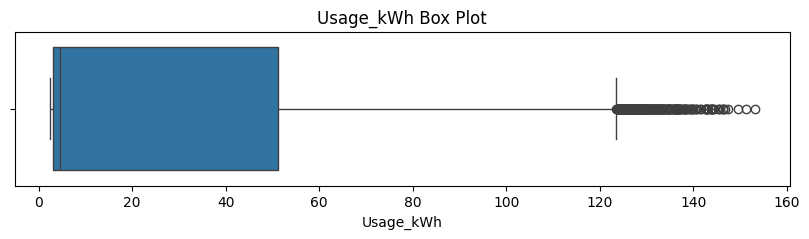


 X_train Outlier Analizi


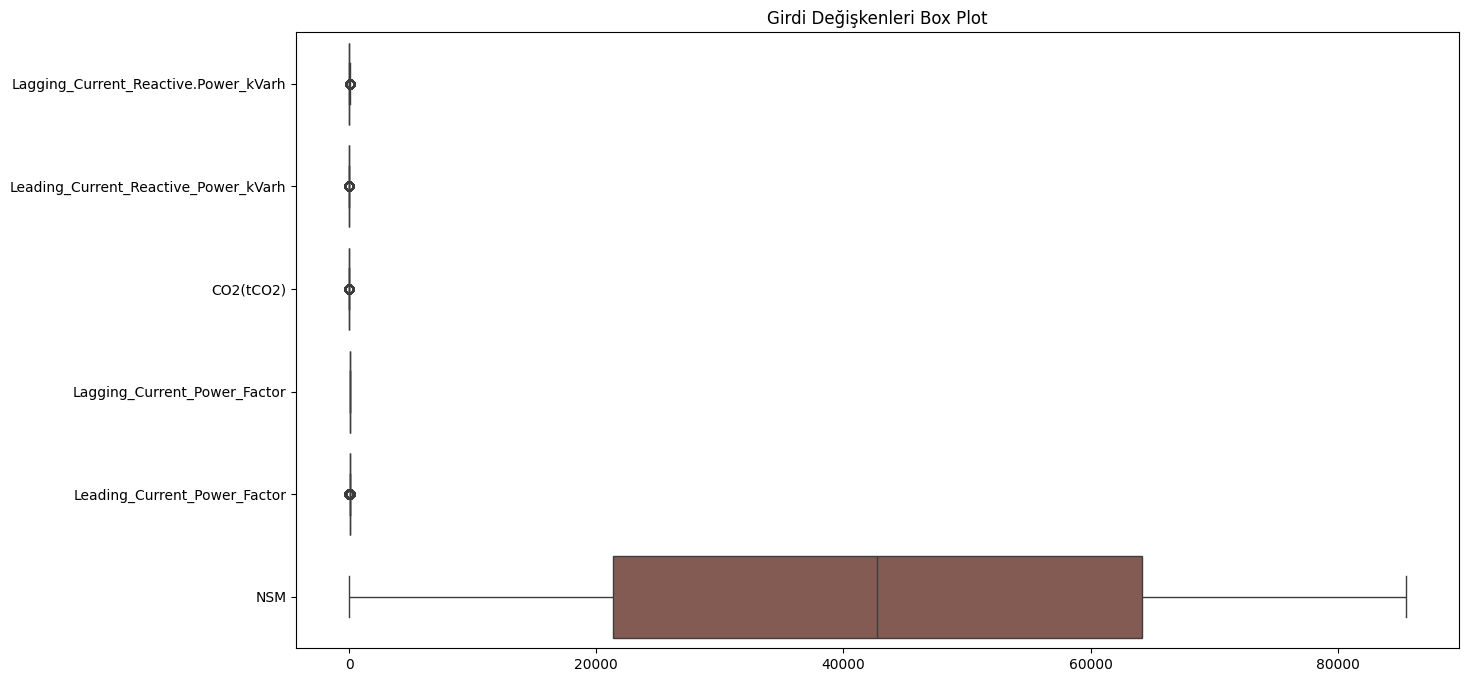

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

#y_train outlier analizi için görselleştirme
print("y_train Outlier Analizi")
plt.figure(figsize=(10, 2))
sns.boxplot(x=y_train)
plt.title('Usage_kWh Box Plot')
plt.show()

#x_train için outlier analizi yapacağım. Orijinal halinde object
#veri tipindekiler için yapılabilecek bir outlier analizine gerek yok
numeric_cols = [
    'Lagging_Current_Reactive.Power_kVarh',
    'Leading_Current_Reactive_Power_kVarh',
    'CO2(tCO2)',
    'Lagging_Current_Power_Factor',
    'Leading_Current_Power_Factor',
    'NSM'
]

#X_train outlier analizi
print("\n X_train Outlier Analizi")
plt.figure(figsize=(15, 8))
sns.boxplot(data=X_train[numeric_cols], orient='h')
plt.title('Girdi Değişkenleri Box Plot')
plt.show()

y_train'de bazı aşırı farklı yerde konumlanmış değerler gözüküyor. Bunlar outlier değer gibi gözükebilir ancak bunlar aslında verinin doğasında olan verilerdir. Bu veriler bize enerjinin pik değerlerini gösteriyor. Bu yüzden herhangi bir çıkarma işlemi yapmayacağım. Çünkü ana problemime uygun.



X_train verileri içinse veriler zaten kendi aralarında anlamlı veriler. Herhangi bir aykırılık gözükmüyor. Sadece NSM yatak eksende diğerlerine göre çok ilerde ve bu bir aykırılık olarak algılanabilir. Bu yüzden StandartScaler işlemi ile verileri birbirine daha uyumlu hale getireceğim.

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()

#eğitim ve test verilerini standardize ediyorum
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
print(X_train_scaled)
print(20*"*")
print(X_test_scaled)

[[-0.62521553 -0.51600691 -0.72199598 ... -0.40987803 -0.40987803
  -0.40987803]
 [-0.53361991 -0.51600691 -0.72199598 ... -0.40987803 -0.40987803
  -0.40987803]
 [-0.60519795 -0.51600691 -0.72199598 ... -0.40987803 -0.40987803
  -0.40987803]
 ...
 [ 2.15722889 -0.51600691  1.11235369 ... -0.40987803 -0.40987803
  -0.40987803]
 [ 1.54092989 -0.51600691  1.11235369 ... -0.40987803 -0.40987803
  -0.40987803]
 [ 2.60246853 -0.51600691  1.72380358 ... -0.40987803 -0.40987803
  -0.40987803]]
********************
[[ 1.97161128 -0.51600691  1.11235369 ... -0.40987803 -0.40987803
  -0.40987803]
 [ 1.05868805 -0.51600691  0.5009038  ... -0.40987803 -0.40987803
  -0.40987803]
 [ 0.23068791 -0.51600691 -0.11054609 ... -0.40987803 -0.40987803
  -0.40987803]
 ...
 [-0.61187047 -0.50664943 -0.72199598 ... -0.40987803 -0.40987803
  -0.40987803]
 [-0.618543   -0.50130229 -0.72199598 ... -0.40987803 -0.40987803
  -0.40987803]
 [-0.62096938 -0.50664943 -0.72199598 ... -0.40987803 -0.40987803
  -0.409878

In [ ]:
import time
import numpy as np
import cupy as cp
from cuml.linear_model import LinearRegression
from cuml.metrics import r2_score, mean_squared_error, mean_absolute_error
#https://docs.rapids.ai/api/cuml/stable/api kütüphane dokümantasyonundan yararlandım

X_train_gpu = cp.asarray(X_train_scaled)
y_train_gpu = cp.asarray(y_train)
X_test_gpu = cp.asarray(X_test_scaled)
y_test_gpu = cp.asarray(y_test)

lr_model = LinearRegression()

start_time = time.time()

lr_model.fit(X_train_gpu, y_train_gpu)

end_time = time.time()
lr_training_time = end_time - start_time
print(f"Eğitim süresi: {lr_training_time:.4f} saniye")

y_pred_lr = lr_model.predict(X_test_gpu)

r2_lr = r2_score(y_test_gpu, y_pred_lr)
rmse_lr = np.sqrt(mean_squared_error(y_test_gpu, y_pred_lr))
mae_lr = mean_absolute_error(y_test_gpu, y_pred_lr)

print("\nLinear Regression Sonuçları")
print(f"R2 Skoru: {r2_lr:.4f}")
print(f"RMSE: {rmse_lr:.4f}")
print(f"MAE: {mae_lr:.4f}")

Eğitim süresi: 0.1029 saniye

Linear Regression Sonuçları
R2 Skoru: 0.9874
RMSE: 3.5170
MAE: 2.3506


In [ ]:
#https://docs.rapids.ai/api/cuml/stable/api cuML kütüphane dokümantasyonundan
#yardım aldım
from cuml.ensemble import RandomForestRegressor

X_train_gpu = cp.asarray(X_train_scaled)
y_train_gpu = cp.asarray(y_train)
X_test_gpu = cp.asarray(X_test_scaled)
y_test_gpu = cp.asarray(y_test)

rf_model = RandomForestRegressor(random_state=42)

start_time = time.time()

rf_model.fit(X_train_gpu, y_train_gpu)

end_time = time.time()
rf_training_time = end_time - start_time
print(f"Eğitim süresi: {rf_training_time:.4f} saniye")

y_pred_rf = rf_model.predict(X_test_gpu)

r2_rf = r2_score(y_test_gpu, y_pred_rf)
rmse_rf = np.sqrt(mean_squared_error(y_test_gpu, y_pred_rf))
mae_rf = mean_absolute_error(y_test_gpu, y_pred_rf)

print("\nRandom Forest (Varsayılan) Sonuçları")
print(f"R2 Skoru: {r2_rf:.4f}")
print(f"RMSE: {rmse_rf:.4f}")
print(f"MAE: {mae_rf:.4f}")
print(f"Eğitim süresi: {rf_training_time:.4f} saniye")

Eğitim süresi: 1.9128 saniye

Random Forest (Varsayılan) Sonuçları
R2 Skoru: 0.9984
RMSE: 1.2363
MAE: 0.5876
Eğitim süresi: 1.9128 saniye


In [ ]:
import xgboost as xgb
#kütüphane dokümantasyonlarından yardım alarak eğitimi yaptım.
#https://xgboost.readthedocs.io/en/stable/parameter.html

#kodun tekrarlanabilirliği için random_state=42 ve genel araştırma-
#larımda gördüğüm kadarıyla objective için kullanılan bir loss function
#değerlerini koydum
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', random_state=42, tree_method='hist', device='cuda')

start_time = time.time()

xgb_model.fit(X_train_scaled, y_train)

end_time = time.time()
xgb_training_time = end_time - start_time
print(f"Eğitim süresi: {xgb_training_time:.4f} saniye")

y_pred_xgb = xgb_model.predict(X_test_scaled)

r2_xgb = r2_score(y_test, y_pred_xgb)
rmse_xgb = np.sqrt(mean_squared_error(y_test, y_pred_xgb))
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)

print("\nXGBoost Sonuçları")
print(f"R2 Skoru: {r2_xgb:.4f}")
print(f"RMSE: {rmse_xgb:.4f}")
print(f"MAE: {mae_xgb:.4f}")
print(f"Eğitim süresi: {xgb_training_time:.4f} saniye")

Eğitim süresi: 0.3414 saniye

XGBoost Sonuçları
R2 Skoru: 0.9992
RMSE: 0.8821
MAE: 0.4760
Eğitim süresi: 0.3414 saniye


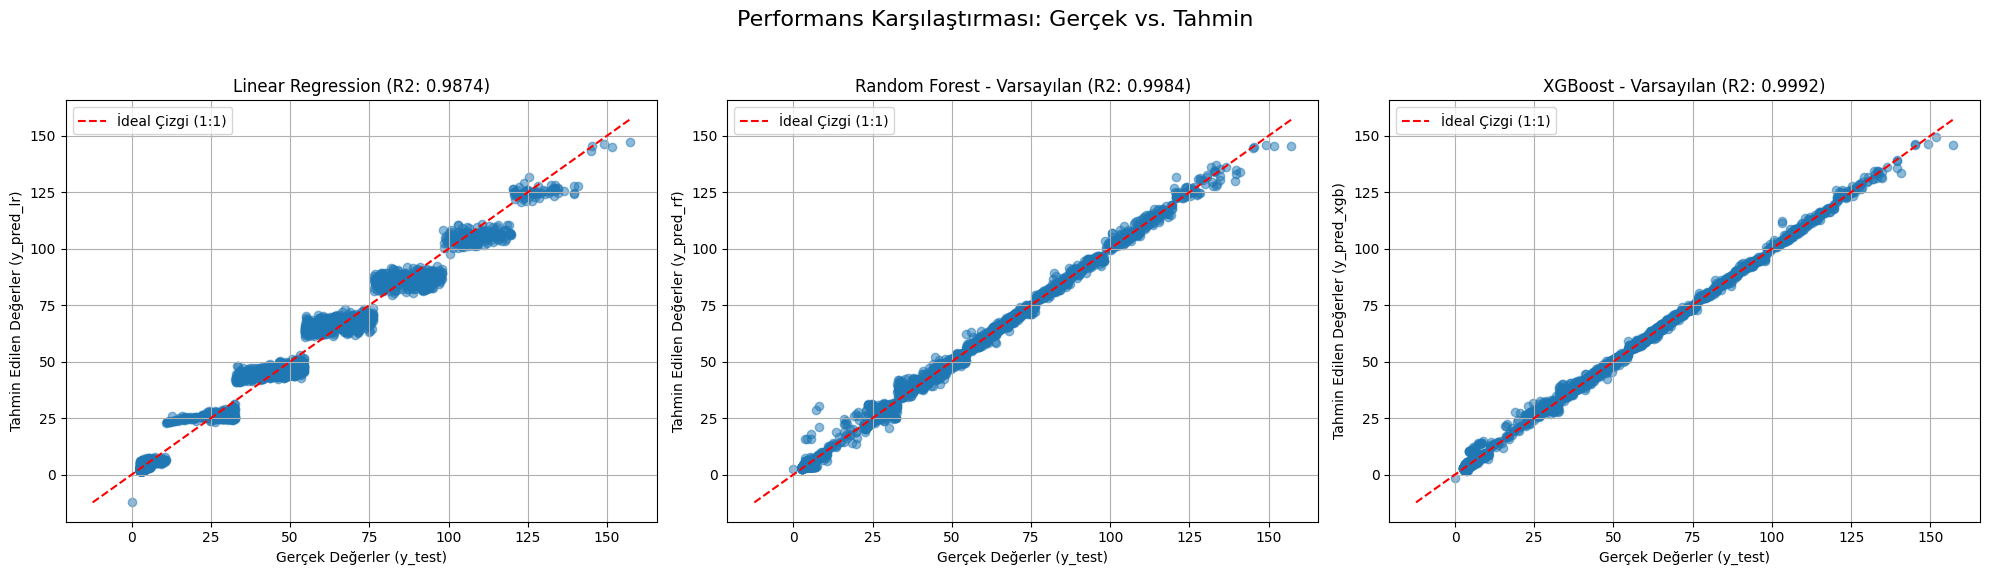

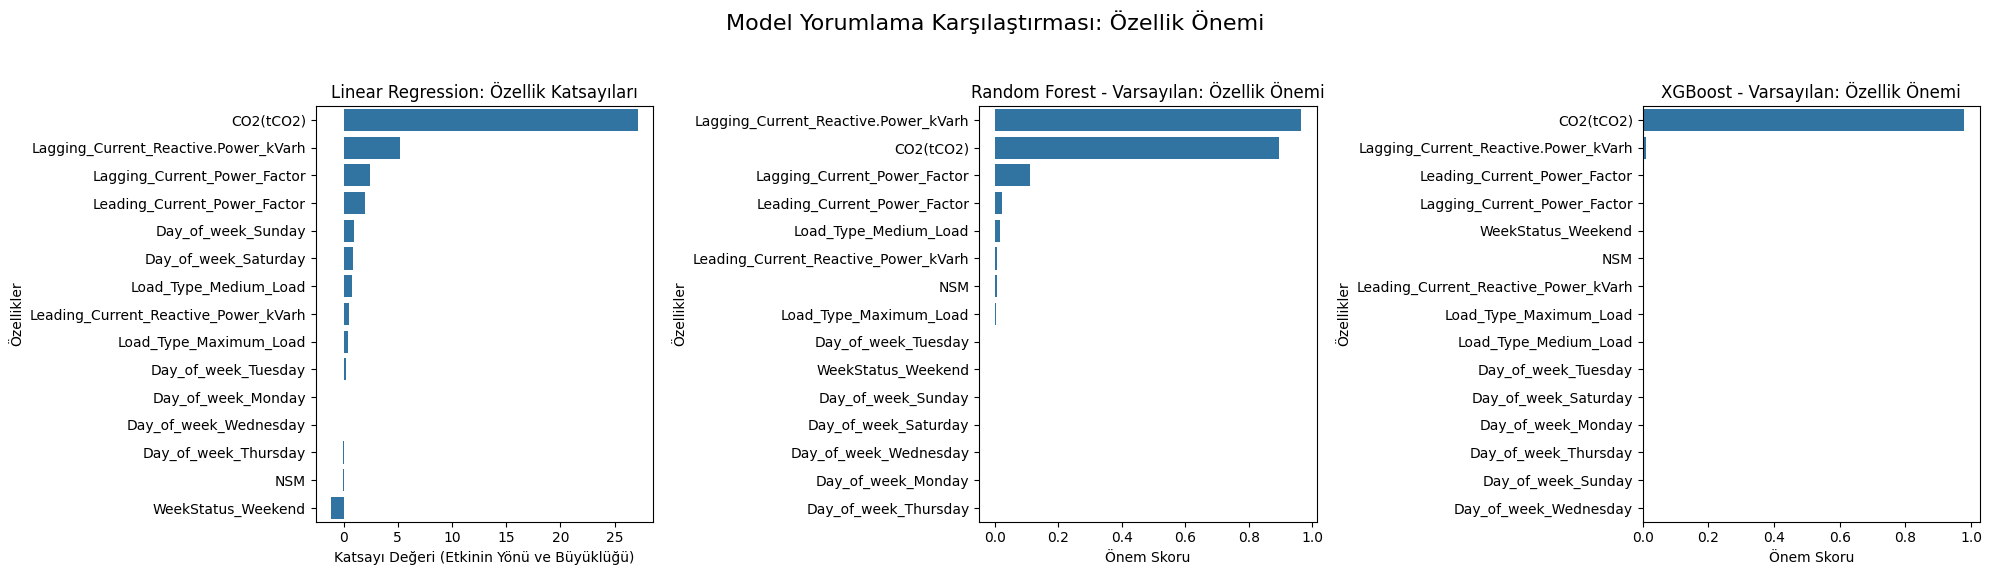

In [ ]:
from sklearn.inspection import permutation_importance
def to_cpu(data):
    if isinstance(data, cp.ndarray):
        return data.get()
    return data

y_test_cpu = to_cpu(y_test)
y_pred_lr_cpu = to_cpu(y_pred_lr)
y_pred_rf_cpu = to_cpu(y_pred_rf)
y_pred_xgb_cpu = to_cpu(y_pred_xgb)

lr_coefs = to_cpu(lr_model.coef_).flatten()
xgb_importances = to_cpu(xgb_model.feature_importances_).flatten()

# Sklearn fonksiyonu olduğu için verileri cpu olarak veriyoruz
rf_perm = permutation_importance(rf_model, to_cpu(X_test_gpu), y_test_cpu, scoring='r2')
rf_importances = rf_perm.importances_mean

min_val = min(y_test_cpu.min(), y_pred_lr_cpu.min(), y_pred_rf_cpu.min(), y_pred_xgb_cpu.min())
max_val = max(y_test_cpu.max(), y_pred_lr_cpu.max(), y_pred_rf_cpu.max(), y_pred_xgb_cpu.max())
perfect_line = np.linspace(min_val, max_val, 100)

fig1, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 6))
fig1.suptitle('Performans Karşılaştırması: Gerçek vs. Tahmin', fontsize=16)

ax1.scatter(y_test_cpu, y_pred_lr_cpu, alpha=0.5)
ax1.plot(perfect_line, perfect_line, color='red', linestyle='--', label='İdeal Çizgi (1:1)')
ax1.set_title(f'Linear Regression (R2: {r2_lr:.4f})')
ax1.set_xlabel('Gerçek Değerler (y_test)')
ax1.set_ylabel('Tahmin Edilen Değerler (y_pred_lr)')
ax1.legend()
ax1.grid(True)

ax2.scatter(y_test_cpu, y_pred_rf_cpu, alpha=0.5)
ax2.plot(perfect_line, perfect_line, color='red', linestyle='--', label='İdeal Çizgi (1:1)')
ax2.set_title(f'Random Forest - Varsayılan (R2: {r2_rf:.4f})')
ax2.set_xlabel('Gerçek Değerler (y_test)')
ax2.set_ylabel('Tahmin Edilen Değerler (y_pred_rf)')
ax2.legend()
ax2.grid(True)

ax3.scatter(y_test_cpu, y_pred_xgb_cpu, alpha=0.5)
ax3.plot(perfect_line, perfect_line, color='red', linestyle='--', label='İdeal Çizgi (1:1)')
ax3.set_title(f'XGBoost - Varsayılan (R2: {r2_xgb:.4f})')
ax3.set_xlabel('Gerçek Değerler (y_test)')
ax3.set_ylabel('Tahmin Edilen Değerler (y_pred_xgb)')
ax3.legend()
ax3.grid(True)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

fig2, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 6))
fig2.suptitle('Model Yorumlama Karşılaştırması: Özellik Önemi', fontsize=16)

lr_coeffs = pd.DataFrame({
    'Feature': X_processed.columns,
    'Coefficient': lr_coefs
}).sort_values(by='Coefficient', ascending=False)

sns.barplot(x='Coefficient', y='Feature', data=lr_coeffs, ax=ax1)
ax1.set_title('Linear Regression: Özellik Katsayıları')
ax1.set_xlabel('Katsayı Değeri (Etkinin Yönü ve Büyüklüğü)')
ax1.set_ylabel('Özellikler')

rf_importances_df = pd.DataFrame({
    'Feature': X_processed.columns,
    'Importance': rf_importances
}).sort_values(by='Importance', ascending=False)

sns.barplot(x='Importance', y='Feature', data=rf_importances_df, ax=ax2)
ax2.set_title('Random Forest - Varsayılan: Özellik Önemi')
ax2.set_xlabel('Önem Skoru')
ax2.set_ylabel('Özellikler')

xgb_importances_df = pd.DataFrame({
    'Feature': X_processed.columns,
    'Importance': xgb_importances
}).sort_values(by='Importance', ascending=False)

sns.barplot(x='Importance', y='Feature', data=xgb_importances_df, ax=ax3)
ax3.set_title('XGBoost - Varsayılan: Özellik Önemi')
ax3.set_xlabel('Önem Skoru')
ax3.set_ylabel('Özellikler')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

In [ ]:
from sklearn.model_selection import RandomizedSearchCV, TimeSeriesSplit
from sklearn.feature_selection import RFECV
from scipy.stats import randint, uniform

start_time = time.time()

#Veri zamana bağımlı veri olduğu için direkt olarak RandomizedSearchCV
#kullanmak çok mantıklı değil. Bu yüzden TimeSeriesSplit ile zaman
#bağımlılığını bozmadan bir kod oluşturdum. (Yapay zekadan yardım aldım)
tss = TimeSeriesSplit(n_splits=5)

xgb_rfe_estimator = xgb.XGBRegressor(objective='reg:squarederror', random_state=42, tree_method='hist', device='cuda', n_jobs=1)

#RFECV elemesiyle her eğitimde en kötü 3 öznitelik çıkarılıyor. Bunların belir-
#lenmesi için kütüphane dokümantasyonundan yararlanıldı.
#https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.RFECV.html
rfecv = RFECV(estimator=xgb_rfe_estimator,
              step=3,
              cv=tss,
              scoring='r2',
              min_features_to_select=5,
              n_jobs=-1)

rfecv.fit(to_cpu(X_train_scaled), to_cpu(y_train))
X_train_selected = rfecv.transform(to_cpu(X_train_scaled))
X_test_selected = rfecv.transform(to_cpu(X_test_scaled))

param_dist_xgb = {
    'n_estimators': randint(100, 1000),      # Ağaç sayısı
    'max_depth': randint(3, 10),             # Ağaçların maksimum derinliği
    'learning_rate': uniform(0.01, 0.3),     # Öğrenme oranı (eta)
    'subsample': uniform(0.7, 0.3),          # Her ağaç için kullanılacak veri oranı
    'colsample_bytree': uniform(0.7, 0.3)    # Her ağaç için kullanılacak özellik (sütun) oranı
}

#en iyi r^2 skorunu verecek randomized xgboost algoritması için
#aşağıdaki kodu çalıştırıyorum. Böylece en iyisini bulabileceğim ve
#onu kullanacağım
xgb_random_search = RandomizedSearchCV(
    estimator=xgb.XGBRegressor(objective='reg:squarederror', random_state=42, tree_method='hist', device='cuda'),
    param_distributions=param_dist_xgb,
    n_iter=50,
    scoring='r2',
    cv=tss, #Burada zamana bağlı bölümleme yapması için verdik
    random_state=42,
    n_jobs=1, #GPU kullanırken çakışma olmaması için 1
    verbose=1
)


xgb_random_search.fit(X_train_selected, to_cpu(y_train))
end_time = time.time()
xgb_optimized_training_time = end_time - start_time
print(f"Optimizasyon süresi: {xgb_optimized_training_time:.4f} saniye")

print(f"\nEn iyi R2 skoru (CV üzerinden): {xgb_random_search.best_score_:.4f}")
print("En iyi parametreler:")
print(xgb_random_search.best_params_)

best_xgb_model = xgb_random_search.best_estimator_
y_pred_best_xgb = best_xgb_model.predict(X_test_selected)

#Metrik hesabı için CPU'ya çevirme (garanti olsun diye)
y_test_cpu = to_cpu(y_test)
y_pred_best_xgb = to_cpu(y_pred_best_xgb)

r2_best_xgb = r2_score(y_test_cpu, y_pred_best_xgb)
rmse_best_xgb = np.sqrt(mean_squared_error(y_test_cpu, y_pred_best_xgb))
mae_best_xgb = mean_absolute_error(y_test_cpu, y_pred_best_xgb)

print("\nOptimize Edilmiş XGBoost Sonuçları")
print(f"R2 Skoru: {r2_best_xgb:.4f}")
print(f"RMSE: {rmse_best_xgb:.4f}")
print(f"MAE: {mae_best_xgb:.4f}")

Fitting 5 folds for each of 50 candidates, totalling 250 fits
Optimizasyon süresi: 259.4088 saniye

En iyi R2 skoru (CV üzerinden): 0.9984
En iyi parametreler:
{'colsample_bytree': np.float64(0.8953231076505833), 'learning_rate': np.float64(0.28448790266313423), 'max_depth': 3, 'n_estimators': 939, 'subsample': np.float64(0.8348352022414609)}

Optimize Edilmiş XGBoost Sonuçları
R2 Skoru: 0.9987
RMSE: 1.1134
MAE: 0.5667


In [ ]:
from sklearn.ensemble import RandomForestRegressor as SklearnRF
from cuml.ensemble import RandomForestRegressor as CumlRF

#Tamamen yukarıdaki koddaki mantığa benzer şekilde bu sefer benzer
#işlemleri RandomForest algoritmasını optimize etmek için kullanıyorum

tss = TimeSeriesSplit(n_splits=5)

rf_rfe_estimator = SklearnRF(random_state=42, n_jobs=-1)

rfecv_rf = RFECV(
    estimator=rf_rfe_estimator,
    step=3,
    cv=tss,
    scoring='r2',
    min_features_to_select=5,
    n_jobs=-1
)

rfecv_rf.fit(to_cpu(X_train_scaled), to_cpu(y_train))

X_train_selected_rf = rfecv_rf.transform(to_cpu(X_train_scaled))
X_test_selected_rf = rfecv_rf.transform(to_cpu(X_test_scaled))

param_dist_rf = {
    'n_estimators': randint(100, 1000),
    'max_depth': randint(5, 20),
    'min_samples_leaf': randint(1, 10),
    'min_samples_split': randint(2, 20),
    'max_features': ['sqrt', 'log2', 1.0]
}

rf_random_search = RandomizedSearchCV(
    estimator=CumlRF(random_state=42),
    param_distributions=param_dist_rf,
    n_iter=50,
    scoring='r2',
    cv=tss,
    random_state=42,
    n_jobs=1,
    verbose=1
)

start_time = time.time()
rf_random_search.fit(X_train_selected_rf, to_cpu(y_train))
end_time = time.time()
rf_optimized_training_time = end_time - start_time
print(f"Optimizasyon süresi: {rf_optimized_training_time:.4f} saniye")

print(f"\nEn iyi R2 skoru (CV üzerinden): {rf_random_search.best_score_:.4f}")
print("En iyi parametreler:")
print(rf_random_search.best_params_)

best_rf_model = rf_random_search.best_estimator_
y_pred_best_rf = best_rf_model.predict(X_test_selected_rf)

y_test_cpu = to_cpu(y_test)
y_pred_best_rf = to_cpu(y_pred_best_rf)

r2_best_rf = r2_score(y_test_cpu, y_pred_best_rf)
rmse_best_rf = np.sqrt(mean_squared_error(y_test_cpu, y_pred_best_rf))
mae_best_rf = mean_absolute_error(y_test_cpu, y_pred_best_rf)

print("\nOptimize Edilmiş Random Forest Sonuçları")
print(f"R2 Skoru: {r2_best_rf:.4f}")
print(f"RMSE: {rmse_best_rf:.4f}")
print(f"MAE: {mae_best_rf:.4f}")

Fitting 5 folds for each of 50 candidates, totalling 250 fits
Optimizasyon süresi: 473.2341 saniye

En iyi R2 skoru (CV üzerinden): 0.9971
En iyi parametreler:
{'max_depth': 17, 'max_features': 1.0, 'min_samples_leaf': 1, 'min_samples_split': 8, 'n_estimators': 620}

Optimize Edilmiş Random Forest Sonuçları
R2 Skoru: 0.9989
RMSE: 1.0547
MAE: 0.5280


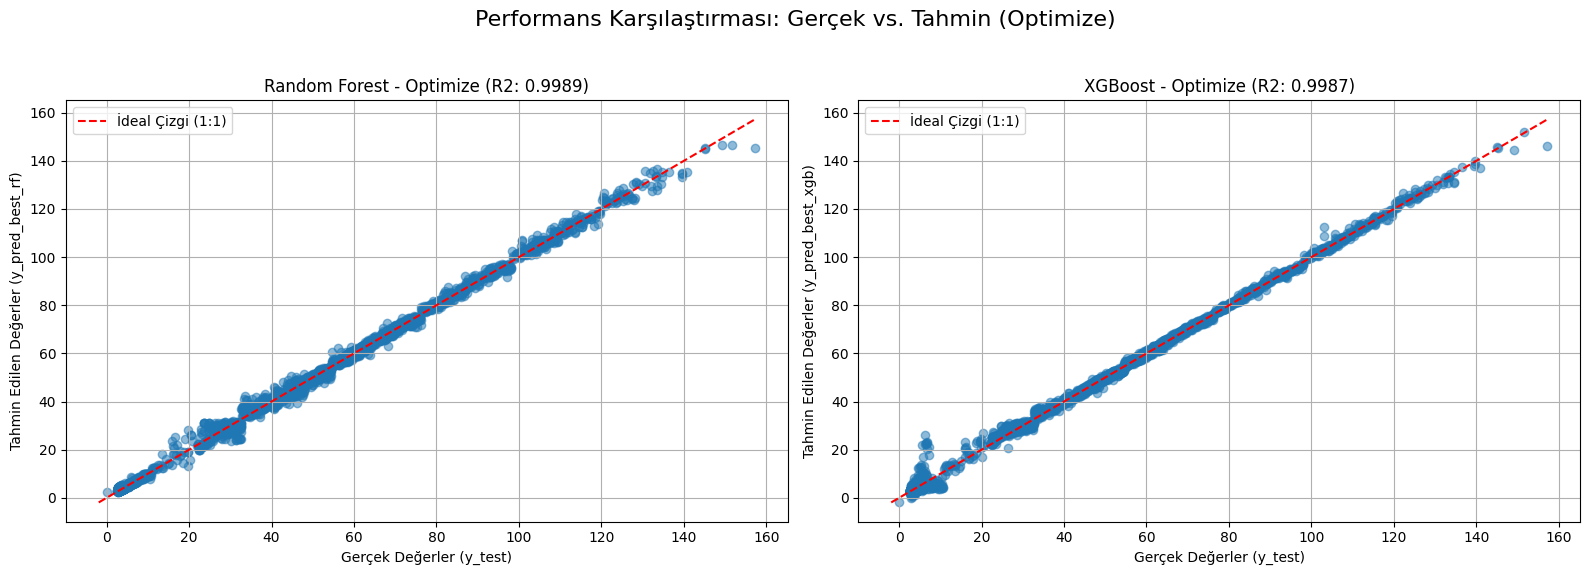

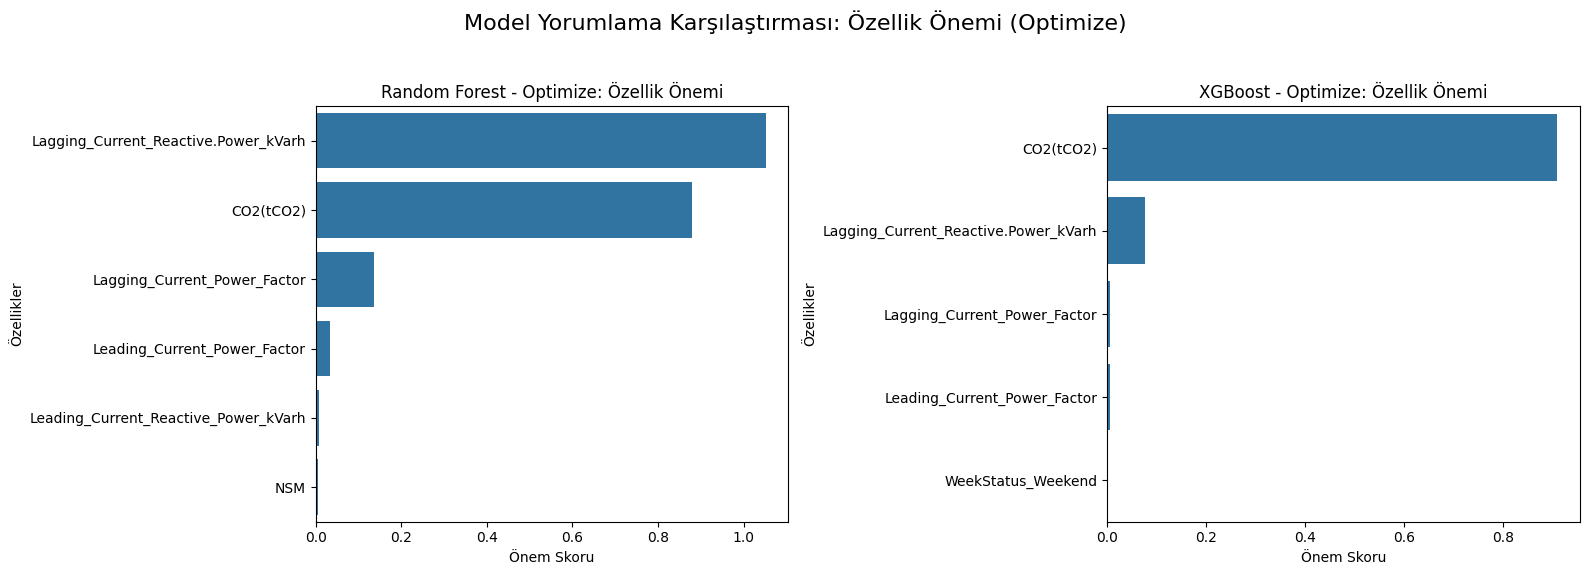

In [ ]:
def to_cpu(data):
    if isinstance(data, cp.ndarray):
        return data.get()
    return data

y_test_cpu = to_cpu(y_test)
y_pred_best_rf_cpu = to_cpu(y_pred_best_rf)
y_pred_best_xgb_cpu = to_cpu(y_pred_best_xgb)

#Random Forest (Optimize Edilmiş) özellik önemi
rf_cols = X_processed.columns[rfecv_rf.support_]
X_test_for_rf = rfecv_rf.transform(to_cpu(X_test_scaled))

rf_perm = permutation_importance(best_rf_model, X_test_for_rf, y_test_cpu, scoring='r2', n_repeats=5, random_state=42, n_jobs=1)
best_rf_importances = rf_perm.importances_mean

#XGBoost (Optimize Edilmiş) özellik önemi
best_xgb_importances = to_cpu(best_xgb_model.feature_importances_).flatten()

if 'rfecv' in locals():
    # Seçilen sütun isimlerini alıyoruz
    xgb_cols = X_processed.columns[rfecv.support_]
else:
    xgb_cols = X_processed.columns

#Algoritmaları karşılaştırmak için görselleştirmeleri yapıyorum:

min_val = min(y_test_cpu.min(), y_pred_best_rf_cpu.min(), y_pred_best_xgb_cpu.min())
max_val = max(y_test_cpu.max(), y_pred_best_rf_cpu.max(), y_pred_best_xgb_cpu.max())
perfect_line = np.linspace(min_val, max_val, 100)

#2 grafiği sığdırmak için 1x2'lik bir alan oluşturuyorum
fig1, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))
fig1.suptitle('Performans Karşılaştırması: Gerçek vs. Tahmin (Optimize)', fontsize=16)

#Grafik 1: Random Forest (Optimize Edilmiş)
ax1.scatter(y_test_cpu, y_pred_best_rf_cpu, alpha=0.5)
ax1.plot(perfect_line, perfect_line, color='red', linestyle='--', label='İdeal Çizgi (1:1)')
ax1.set_title(f'Random Forest - Optimize (R2: {r2_best_rf:.4f})')
ax1.set_xlabel('Gerçek Değerler (y_test)')
ax1.set_ylabel('Tahmin Edilen Değerler (y_pred_best_rf)')
ax1.legend()
ax1.grid(True)

#Grafik 2: XGBoost (Optimize Edilmiş)
ax2.scatter(y_test_cpu, y_pred_best_xgb_cpu, alpha=0.5)
ax2.plot(perfect_line, perfect_line, color='red', linestyle='--', label='İdeal Çizgi (1:1)')
ax2.set_title(f'XGBoost - Optimize (R2: {r2_best_xgb:.4f})')
ax2.set_xlabel('Gerçek Değerler (y_test)')
ax2.set_ylabel('Tahmin Edilen Değerler (y_pred_best_xgb)')
ax2.legend()
ax2.grid(True)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

fig2, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))
fig2.suptitle('Model Yorumlama Karşılaştırması: Özellik Önemi (Optimize)', fontsize=16)

#Grafik 1: Random Forest (Optimize Edilmiş Önem)
best_rf_importances_df = pd.DataFrame({
    'Feature': rf_cols, #Filtrelenmiş sütun isimlerini kullanıyorum
    'Importance': best_rf_importances
}).sort_values(by='Importance', ascending=False)

sns.barplot(x='Importance', y='Feature', data=best_rf_importances_df, ax=ax1)
ax1.set_title('Random Forest - Optimize: Özellik Önemi')
ax1.set_xlabel('Önem Skoru')
ax1.set_ylabel('Özellikler')

#Grafik 2: XGBoost (Optimize Edilmiş Önem)
best_xgb_importances_df = pd.DataFrame({
    'Feature': xgb_cols, #Filtrelenmiş sütun isimlerini kullanıyorum
    'Importance': best_xgb_importances
}).sort_values(by='Importance', ascending=False)

sns.barplot(x='Importance', y='Feature', data=best_xgb_importances_df, ax=ax2)
ax2.set_title('XGBoost - Optimize: Özellik Önemi')
ax2.set_xlabel('Önem Skoru')
ax2.set_ylabel('Özellikler')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

In [ ]:
metrics = {
    'Model': [
        'Linear Regression',
        'Random Forest (Varsayılan)',
        'Random Forest (Optimize Edilmiş)',
        'XGBoost (Varsayılan)',
        'XGBoost (Optimize Edilmiş)'
    ],
    'R2 Skoru': [
        r2_lr,
        r2_rf,
        r2_best_rf,
        r2_xgb,
        r2_best_xgb
    ],
    'RMSE': [
        rmse_lr,
        rmse_rf,
        rmse_best_rf,
        rmse_xgb,
        rmse_best_xgb
    ],
    'MAE': [
        mae_lr,
        mae_rf,
        mae_best_rf,
        mae_xgb,
        mae_best_xgb
    ],
    'Eğitim/Optimizasyon Süresi (s)': [
        lr_training_time,
        rf_training_time,
        rf_optimized_training_time,
        xgb_training_time,
        xgb_optimized_training_time
    ]
}

metrics_df = pd.DataFrame(metrics)
print(metrics_df.to_markdown(index=False))


| Model                            |   R2 Skoru |     RMSE |      MAE |   Eğitim/Optimizasyon Süresi (s) |
|:---------------------------------|-----------:|---------:|---------:|---------------------------------:|
| Linear Regression                |   0.987432 | 3.51702  | 2.35059  |                         0.102936 |
| Random Forest (Varsayılan)       |   0.998447 | 1.23627  | 0.587616 |                         1.91283  |
| Random Forest (Optimize Edilmiş) |   0.99887  | 1.0547   | 0.527956 |                       473.234    |
| XGBoost (Varsayılan)             |   0.999209 | 0.882097 | 0.476025 |                         0.341375 |
| XGBoost (Optimize Edilmiş)       |   0.998741 | 1.11337  | 0.566723 |                       259.409    |


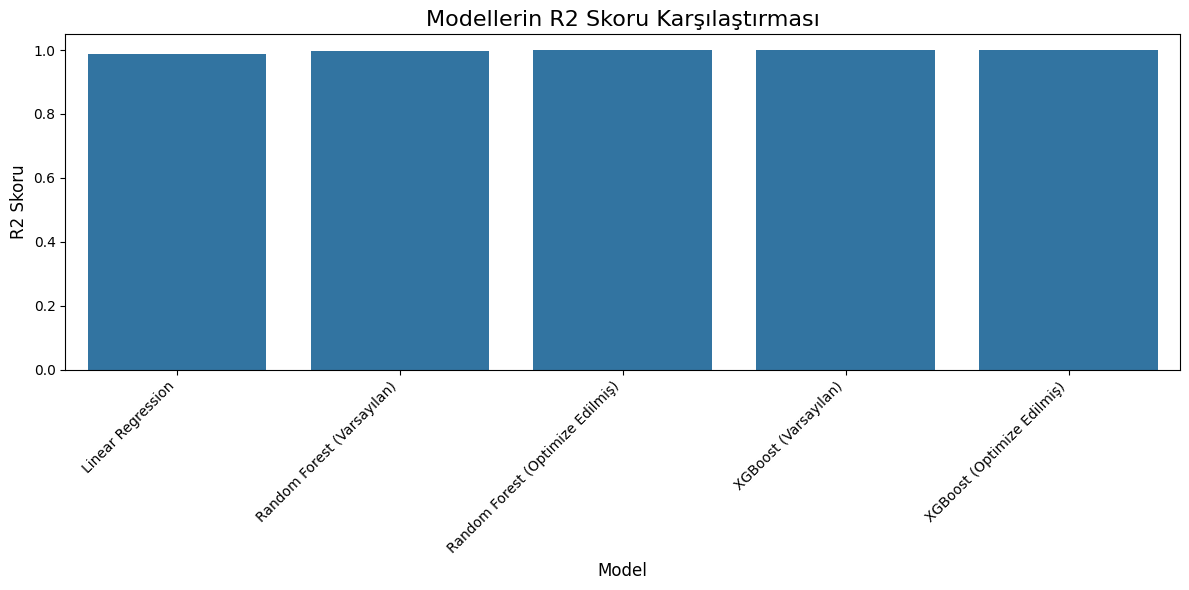

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.barplot(x='Model', y='R2 Skoru', data=metrics_df)
plt.title('Modellerin R2 Skoru Karşılaştırması', fontsize=16)
plt.xlabel('Model', fontsize=12)
plt.ylabel('R2 Skoru', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

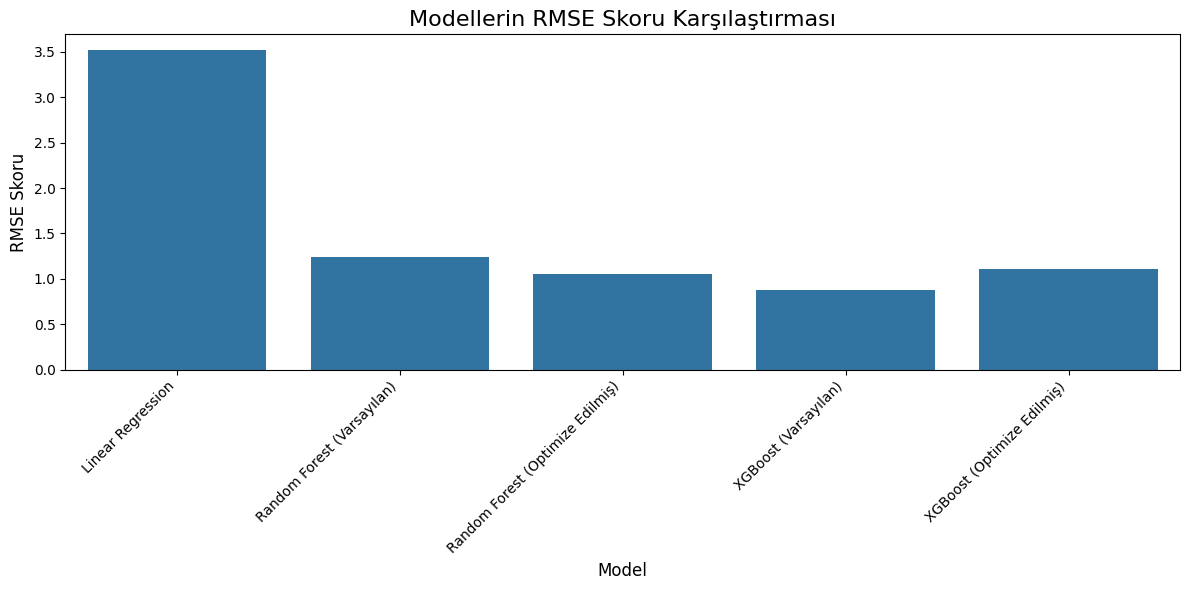

In [ ]:
plt.figure(figsize=(12, 6))
sns.barplot(x='Model', y='RMSE', data=metrics_df)
plt.title('Modellerin RMSE Skoru Karşılaştırması', fontsize=16)
plt.xlabel('Model', fontsize=12)
plt.ylabel('RMSE Skoru', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

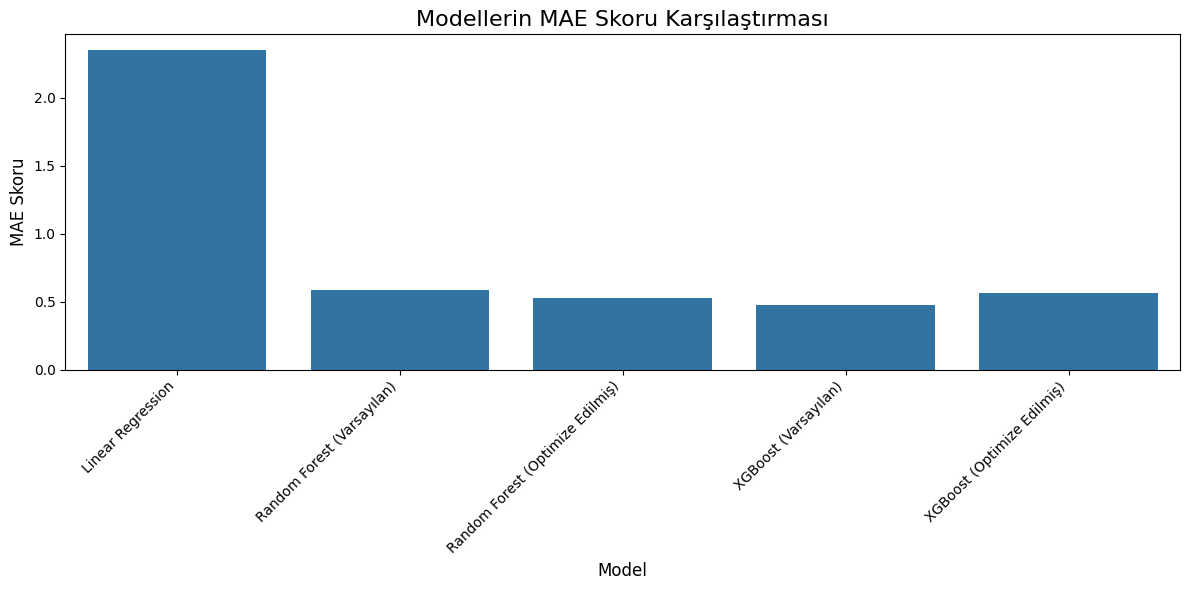

In [ ]:
plt.figure(figsize=(12, 6))
sns.barplot(x='Model', y='MAE', data=metrics_df)
plt.title('Modellerin MAE Skoru Karşılaştırması', fontsize=16)
plt.xlabel('Model', fontsize=12)
plt.ylabel('MAE Skoru', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

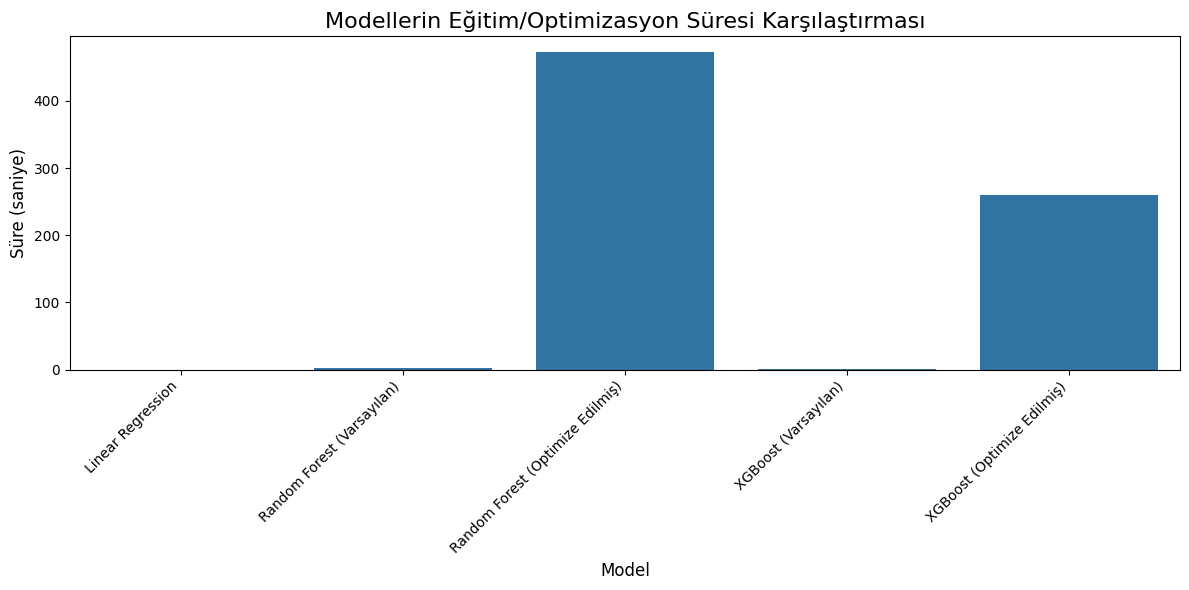

In [ ]:
plt.figure(figsize=(12, 6))
sns.barplot(x='Model', y='Eğitim/Optimizasyon Süresi (s)', data=metrics_df)
plt.title('Modellerin Eğitim/Optimizasyon Süresi Karşılaştırması', fontsize=16)
plt.xlabel('Model', fontsize=12)
plt.ylabel('Süre (saniye)', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Modeller için uygulanan metriklere göre en iyi sıralaması şöyledir: ***XGBoost (Varsayılan) > Random Forest (Optimize Edilmiş) > XGBoost (Optimize Edilmiş) > Random Forest (Varsayılan) > Linear Regression.*** Nedenleri aşağıda sıralanmıştır:

(Daha detaylı ve zamanla alakalı yorumlar raporda bulunacaktır.)

**XGBoost (Varsayılan)**: En yüksek R2 Skoru (0.9992), en düşük RMSE (0.8821) ve en düşük MAE (0.4760) ile tartışmasız en iyi performansı göstermiştir. Ayrıca 0.83 saniye gibi çok kısa bir eğitim süresiyle, hem hız hem de doğruluk açısından en verimli model olmuştur.

**Random Forest (Optimize Edilmiş)**: R2 Skoru (0.9989) ile ikinci en iyi modeldir. Varsayılan Random Forest modeline göre hatayı azaltmış olsa da 482 saniyelik çok yüksek eğitim süresi (maliyet), sağladığı performans artışına kıyasla oldukça fazladır.

**XGBoost (Optimize Edilmiş)**: R2 Skoru (0.9987) ile yüksek bir başarı gösterse de varsayılan XGBoost modelinin gerisinde kalmıştır. Bu durum, varsayılan parametrelerin bu veri seti için zaten optimale çok yakın olduğunu ve ekstra optimizasyonun (ve harcanan 258 saniyenin) marjinal bir katkı sağlamadığını göstermektedir.

**Random Forest (Varsayılan)**: R2 Skoru (0.9984) ile başarılı bir temel model performansı sergilemiştir. Optimize edilmiş haline göre biraz daha yüksek hata oranlarına sahip olsa da, 2.75 saniyelik eğitim süresiyle çok daha hızlıdır.

**Linear Regression:** Diğer modellere kıyasla en düşük R2 Skoru (0.9874) ve en yüksek RMSE (3.5170) ve MAE (2.3506) değerleri ile en düşük performansı göstermiştir. Veri setindeki karmaşık ve doğrusal olmayan ilişkileri yakalamakta yetersiz kalmıştır.

Aşağıda en iyi performansı gösteren XGBoost (Varsayılan) modeli için yapılan SHAP analizi bulunmaktadır.

In [ ]:
!pip install shap

SHAP Özet Grafiği (Global Açıklama):


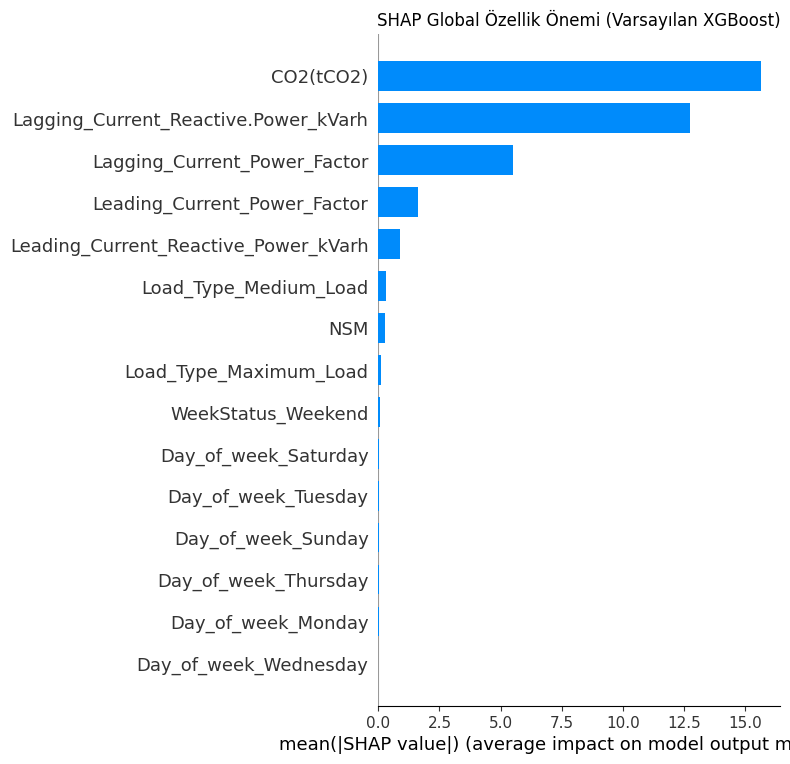

SHAP Özet Grafiği (Detaylı):


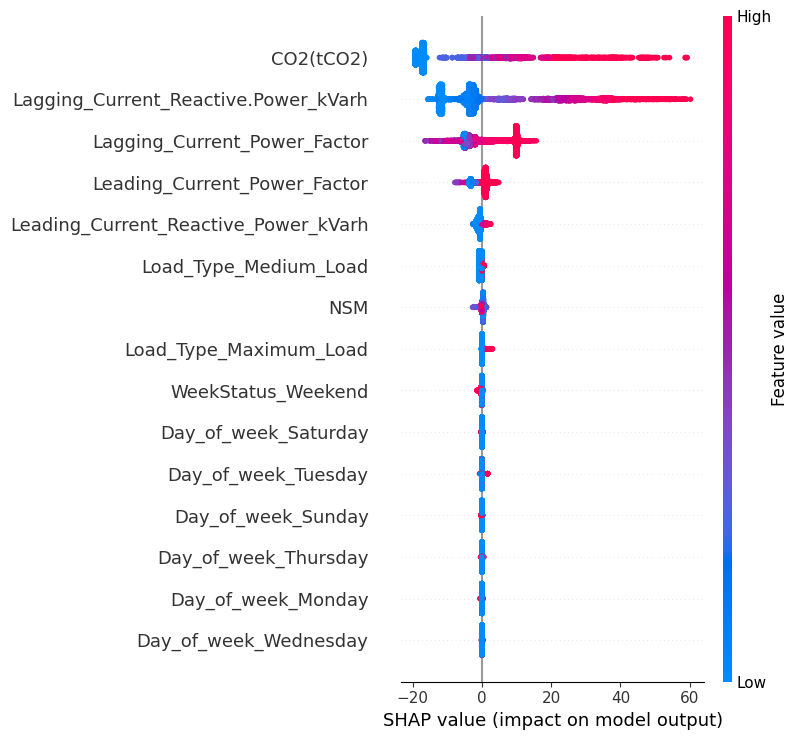

SHAP Force Plot (Tek bir tahminin açıklaması - Lokal):


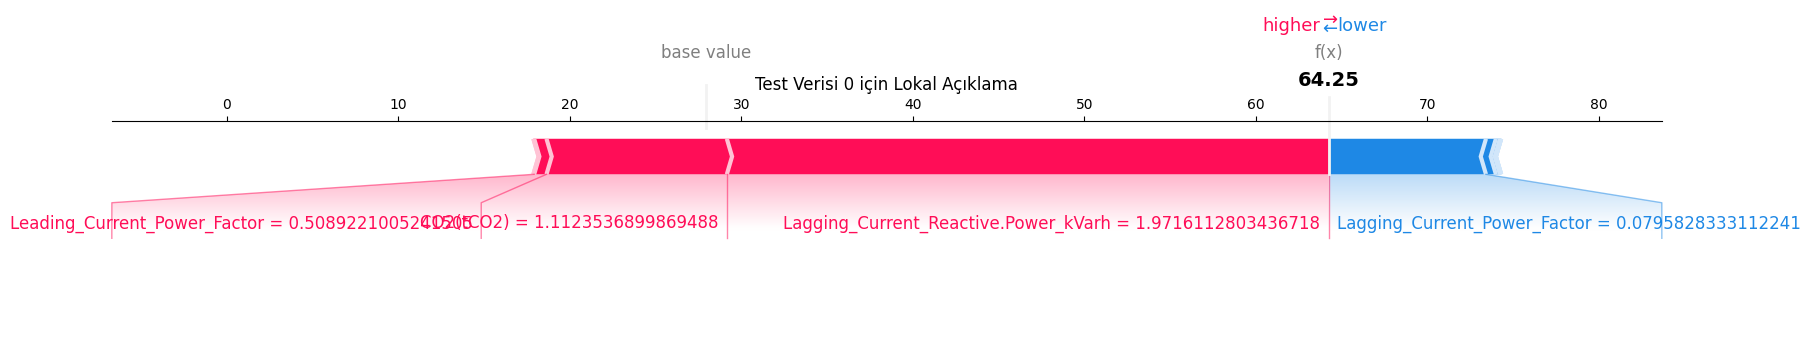

In [ ]:
#Daha önce shap analizi yaklaşımını bilmediğim için çeşitli sitelerden yaptığım araştırmalar
#ve yapay zekadan aldığım destekle aşağıdaki kodu oluşturdum. En iyi modelim optimize edilmiş
#xgb modelim olduğu için shap analizini bu modele uyguladım.
import shap

#shap analizi cpu ile daha iyi çalıştığı için aşağıdaki kodu yazıyoruz.
X_test_cpu = to_cpu(X_test_scaled)
X_test_shap_df = pd.DataFrame(X_test_cpu, columns=X_processed.columns)

explainer = shap.TreeExplainer(xgb_model)

#SHAP değerlerini hesaplıyoruz
shap_values = explainer.shap_values(X_test_shap_df)

print("SHAP Özet Grafiği (Global Açıklama):")
shap.summary_plot(shap_values, X_test_shap_df, plot_type="bar", show=False)
plt.title("SHAP Global Özellik Önemi (Varsayılan XGBoost)")
plt.show()

print("SHAP Özet Grafiği (Detaylı):")
shap.summary_plot(shap_values, X_test_shap_df, show=False)
plt.show()

print("SHAP Force Plot (Tek bir tahminin açıklaması - Lokal):")
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values[0,:], X_test_shap_df.iloc[0,:], matplotlib=True, show=False)
plt.title("Test Verisi 0 için Lokal Açıklama")
plt.show()